In [34]:
import numpy as np 
from qc_lab.algorithms import MeanField
from qc_lab.models import HolsteinLatticeModel
from qc_lab import Simulation
from qc_lab.dynamics import serial_driver



simulation_settings = dict(dt = 0.01, tmax = 10, num_trajs = 10000, batch_size = 1000)
sim = Simulation(simulation_settings)
model_constants = dict(N = 3, j = 1.0,w = .1, g = 1, periodic_boundary = True)
sim.model = HolsteinLatticeModel(model_constants)
sim.algorithm = MeanField()


wf_db_0 = np.zeros(sim.model.constants.num_quantum_states) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.wf_db = wf_db_0

data_mf = serial_driver(sim)


  0%|          | 0/1001 [00:00<?, ?it/s]

100%|██████████| 1001/1001 [00:00<00:00, 1941.13it/s]


10000


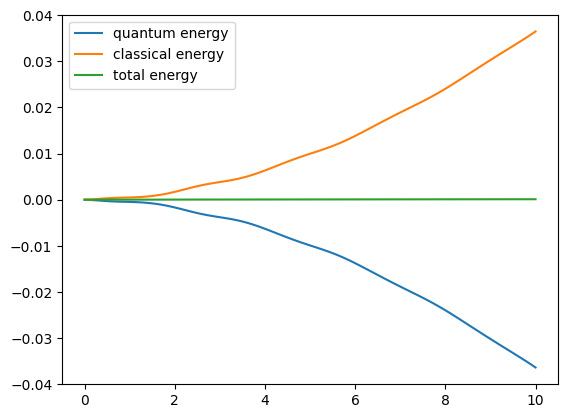

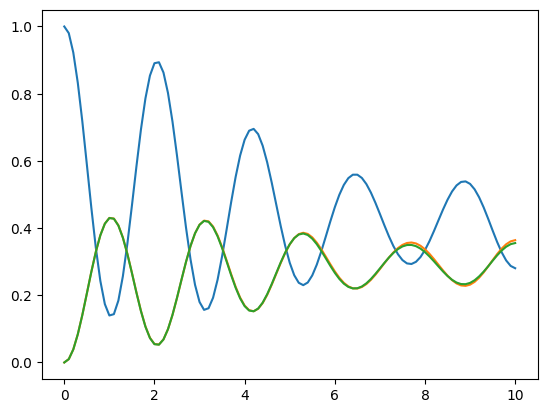

In [35]:
data = data_mf
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))

import matplotlib.pyplot as plt
plt.plot(sim.settings.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.settings.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.settings.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.settings.tdat_output,pops)
plt.show()

In [38]:
import numpy as np 
from qc_lab.algorithms import FewestSwitchesSurfaceHopping
from qc_lab.models import HolsteinLatticeModel
from qc_lab import Simulation
from qc_lab.dynamics import serial_driver


simulation_settings = dict(dt = 0.01, tmax = 10, num_trajs = 10000, batch_size = 10000)
sim = Simulation(simulation_settings)
model_constants = dict(N = 3, j = 1.0,w = 0.1, g = 1, periodic_boundary = True)
sim.model = HolsteinLatticeModel(model_constants)
sim.algorithm = FewestSwitchesSurfaceHopping()


wf_db_0 = np.zeros(sim.model.constants.num_quantum_states) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.wf_db = wf_db_0

data_fssh = serial_driver(sim)

100%|██████████| 1001/1001 [00:25<00:00, 39.28it/s]


10000


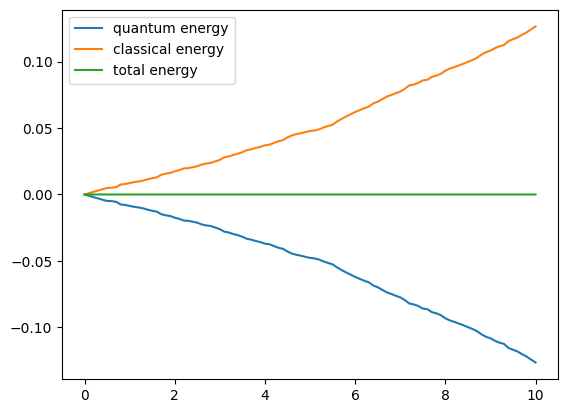

10000


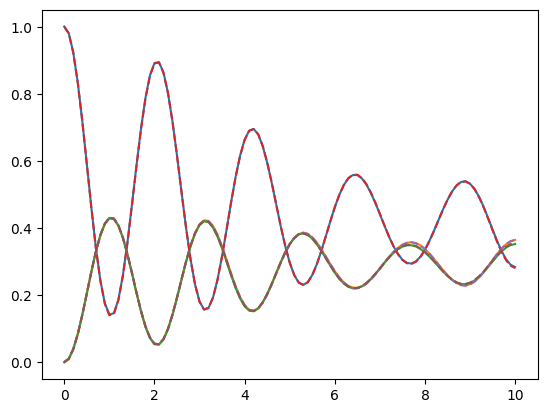

In [39]:
data = data_fssh
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))

import matplotlib.pyplot as plt
plt.plot(sim.settings.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.settings.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.settings.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.settings.tdat_output,pops)
data = data_mf
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))
plt.plot(sim.settings.tdat_output,pops, linestyle='dashed')
plt.show()
